### Import Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### About the Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/code/dataset.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,25.599109,85.137355,-84.274113,0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,25.433286,85.070053,-97.653121,0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,25.498809,85.211371,-87.046134,0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,25.735138,85.208400,-94.143159,0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,25.538556,85.159860,-94.564765,0,38.292038,30.342828,5G,-90.489100,-103.318303,-95.102467
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,25.640701,85.014134,-91.196029,0,1.712596,190.682844,LTE,-93.474707,-97.957579,-94.192907
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,25.766333,85.096190,-85.653092,0,4.036609,99.887024,4G,-87.985282,-90.770017,-86.186870
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,25.640104,85.033861,-85.980052,0,2.670605,132.078006,LTE,-89.114867,-95.776177,-85.434695
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,25.585705,85.305704,-96.842118,0,2.992507,196.541935,LTE,-96.259184,-102.428937,-98.709876
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,25.564499,85.088607,-84.643065,0,1.567842,130.536386,3G,0.000000,0.000000,0.000000


#### Dataset Dimensions

In [4]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 33 columns


#### Concise summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   dt                            104345 non-null  int64  
 1   switch                        104345 non-null  int64  
 2   src                           104345 non-null  object 
 3   dst                           104345 non-null  object 
 4   pktcount                      104345 non-null  int64  
 5   bytecount                     104345 non-null  int64  
 6   dur                           104345 non-null  int64  
 7   dur_nsec                      104345 non-null  int64  
 8   tot_dur                       104345 non-null  float64
 9   flows                         104345 non-null  int64  
 10  packetins                     104345 non-null  int64  
 11  pktperflow                    104345 non-null  int64  
 12  byteperflow                   104345 non-nul

#### Descriptive statistics of dataset

In [6]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,label,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,...,104345.000000,104345.000000,104345.000000,104345.000000,104345.0,104345.000000,104345.000000,104345.000000,104345.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,...,0.390857,25.594760,85.137339,-90.075840,0.0,16.186913,101.315315,-68.858335,-74.481658,-68.857625
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,...,0.487945,0.089875,0.090098,5.398277,0.0,25.703287,56.015830,40.022389,43.189357,39.972335
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,...,0.000000,25.414575,84.957936,-116.942267,0.0,1.000423,10.019527,-115.667514,-124.652054,-119.207545
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,...,0.000000,25.522688,85.064155,-93.620733,0.0,2.001940,50.298335,-94.020193,-101.250209,-93.750988
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,...,0.000000,25.595349,85.138149,-89.668606,0.0,2.997232,100.237645,-89.130455,-96.841612,-89.284986
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,...,1.000000,25.667588,85.209531,-86.148326,0.0,9.958794,149.951112,-74.873946,-84.196255,-76.451133
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,...,1.000000,25.773648,85.316994,-74.644848,0.0,99.985831,199.991081,0.000000,0.000000,0.000000


#### heatmap of missing values

<Axes: >

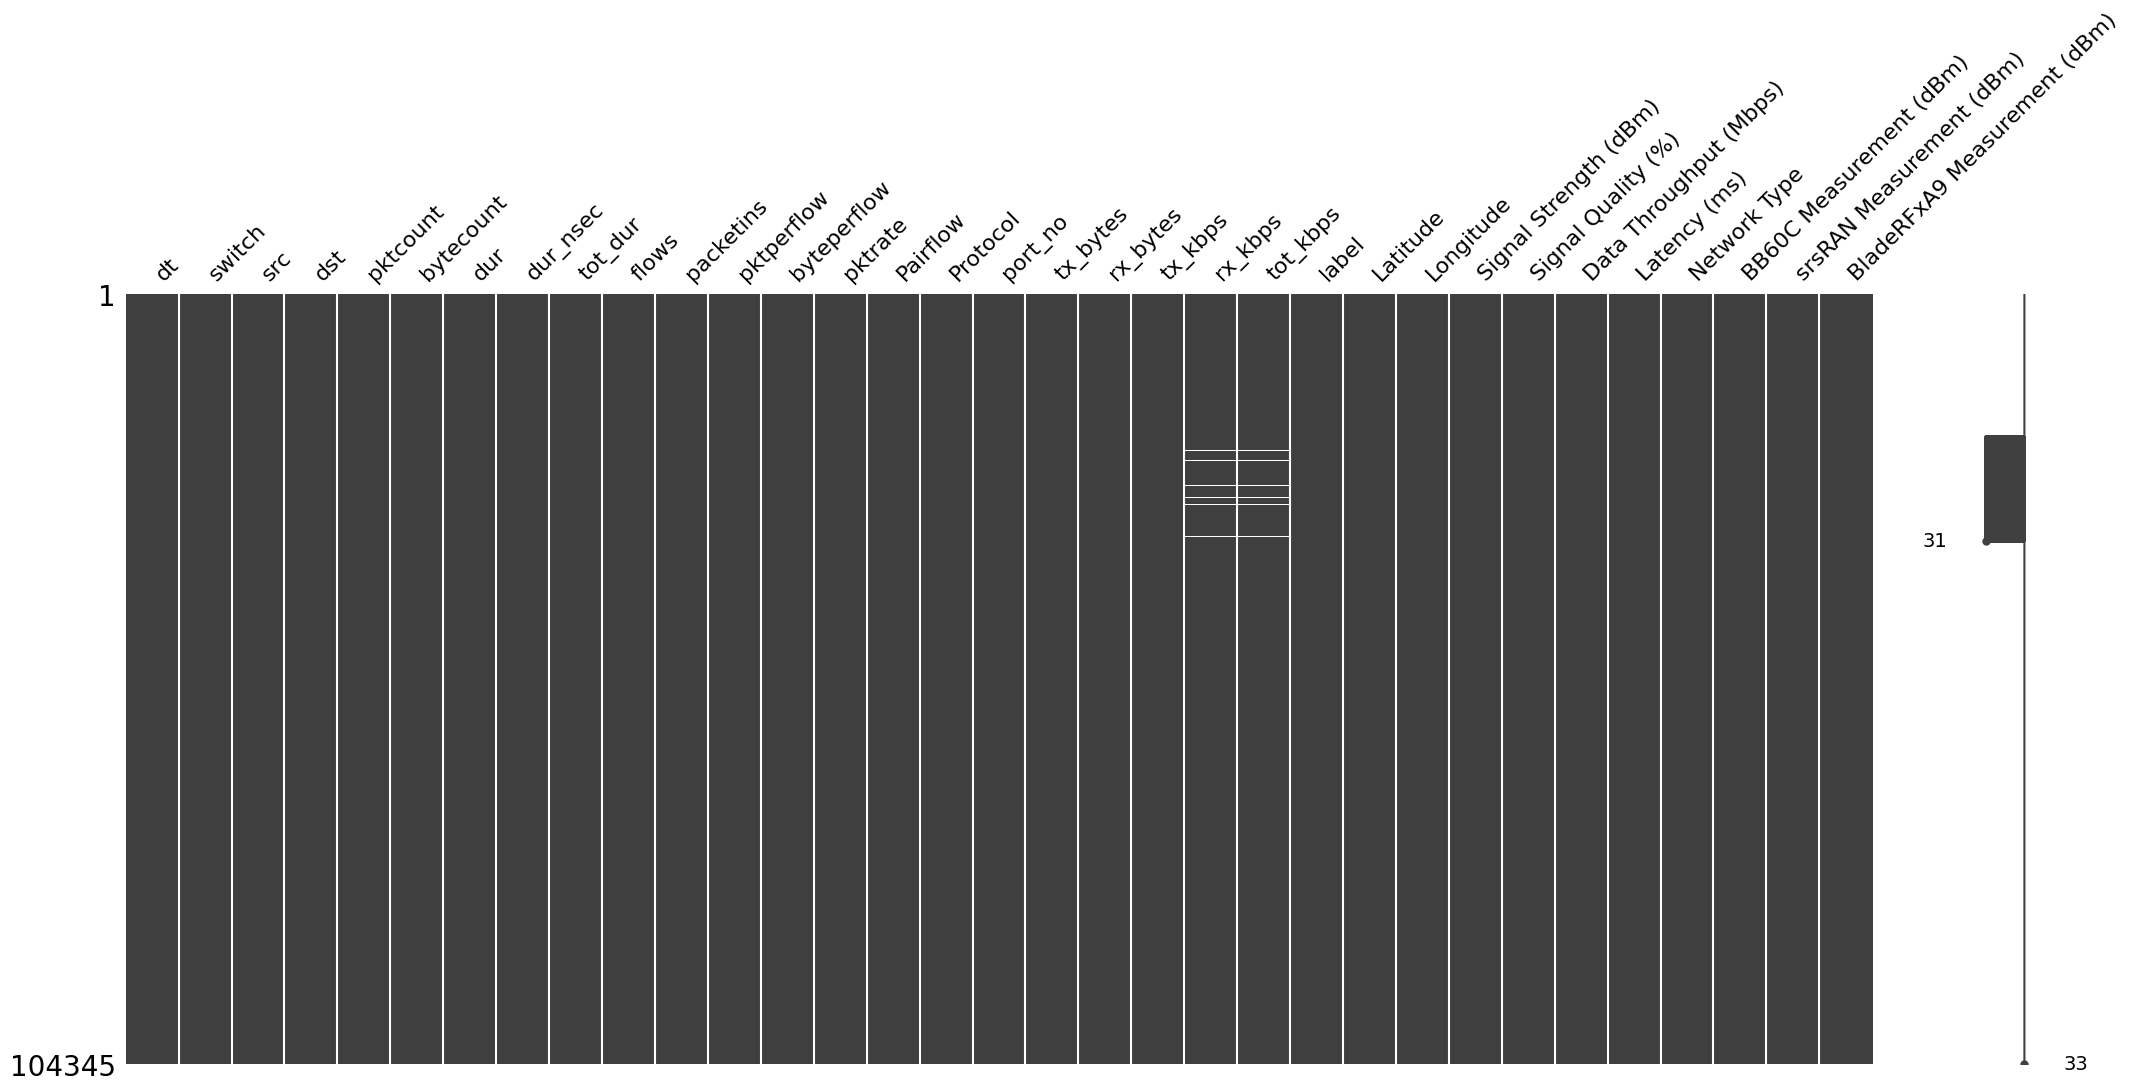

In [7]:
msno.matrix(df)

#### Count of null values in each feature

In [8]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [9]:
(df.isnull().sum()/df.isnull().count())*100

,0
dt,0.00000
switch,0.00000
src,0.00000
dst,0.00000
pktcount,0.00000
bytecount,0.00000
dur,0.00000
dur_nsec,0.00000
tot_dur,0.00000
flows,0.00000


#### Drop rows with null values

In [10]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [11]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt                              0
switch                          0
src                             0
dst                             0
pktcount                        0
bytecount                       0
dur                             0
dur_nsec                        0
tot_dur                         0
flows                           0
packetins                       0
pktperflow                      0
byteperflow                     0
pktrate                         0
Pairflow                        0
Protocol                        0
port_no                         0
tx_bytes                        0
rx_bytes                        0
tx_kbps                         0
rx_kbps                         0
tot_kbps                        0
label                           0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type  

#### Distribution of Target Class

In [12]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

<ipython-input-13-612d2f821f7f>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100


Text(0, 0.5, 'Frequency %')

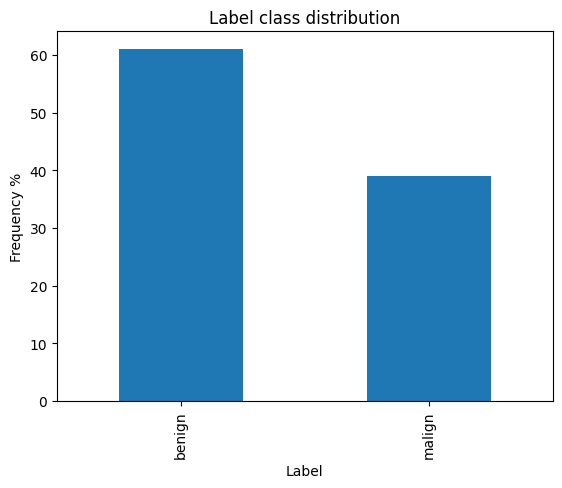

In [13]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

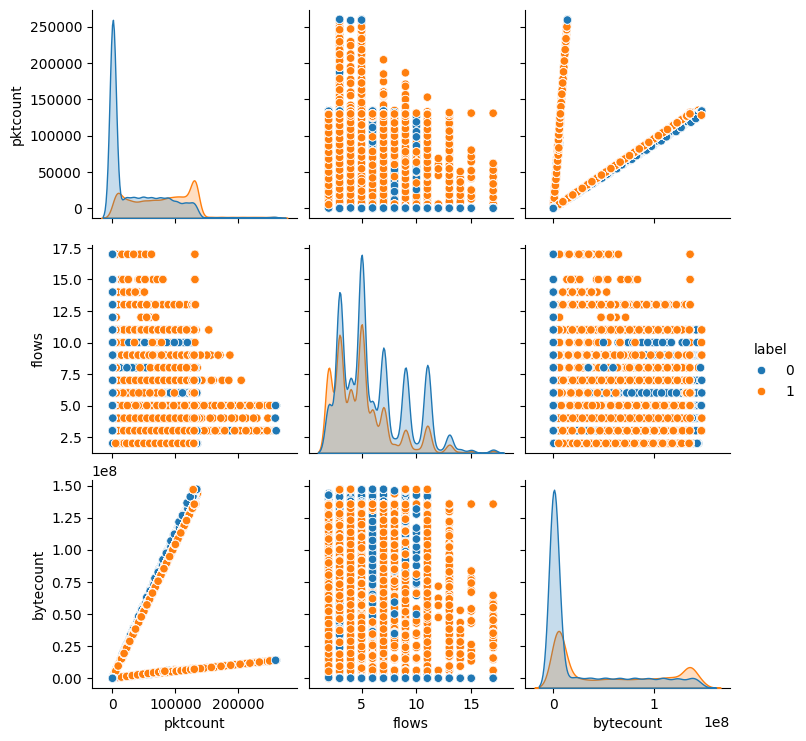

In [14]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [15]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'Latitude',
       'Longitude', 'Signal Strength (dBm)', 'Signal Quality (%)',
       'Data Throughput (Mbps)', 'Latency (ms)', 'Network Type',
       'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)',
       'BladeRFxA9 Measurement (dBm)'],
      dtype='object')

#### Unique values in each column

In [16]:
print(df.apply(lambda col: col.unique()))

dt                              [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src                             [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst                             [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount                        [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount                       [48294064, 134737070, 96294978, 110721156, 913...
dur                             [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec                        [716000000, 734000000, 744000000, 747000000, 7...
tot_dur                         [101000000000.0, 281000000000.0, 201000000000....
flows                           [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins                       [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow                      [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow     

#### Numerical Features

In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 29 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'Latitude', 'Longitude', 'Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)', 'Latency (ms)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']


#### Categorical Features

In [18]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 4 and they are : 
 ['src', 'dst', 'Protocol', 'Network Type']


#### Number of Unique values in the numerical features

In [19]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

,0
dt,858
switch,10
pktcount,9044
bytecount,9270
dur,840
dur_nsec,1000
tot_dur,4183
flows,15
packetins,168
pktperflow,2092


#### Discrete numerical features

In [20]:
#discrete numerical features
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 5 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no', 'Signal Quality (%)']


In [21]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no,Signal Quality (%)
0,1,3,0,3,0
1,1,2,0,4,0
2,1,3,0,1,0
3,1,3,0,2,0
4,1,3,0,3,0
5,1,3,0,1,0
6,1,3,0,4,0
7,1,3,0,1,0
8,1,3,0,2,0
9,1,3,0,4,0


#### Continuous features

In [22]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 23 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'Latitude', 'Longitude', 'Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']


### Exploratory Data Analysis

#### Plotting function definition

In [23]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

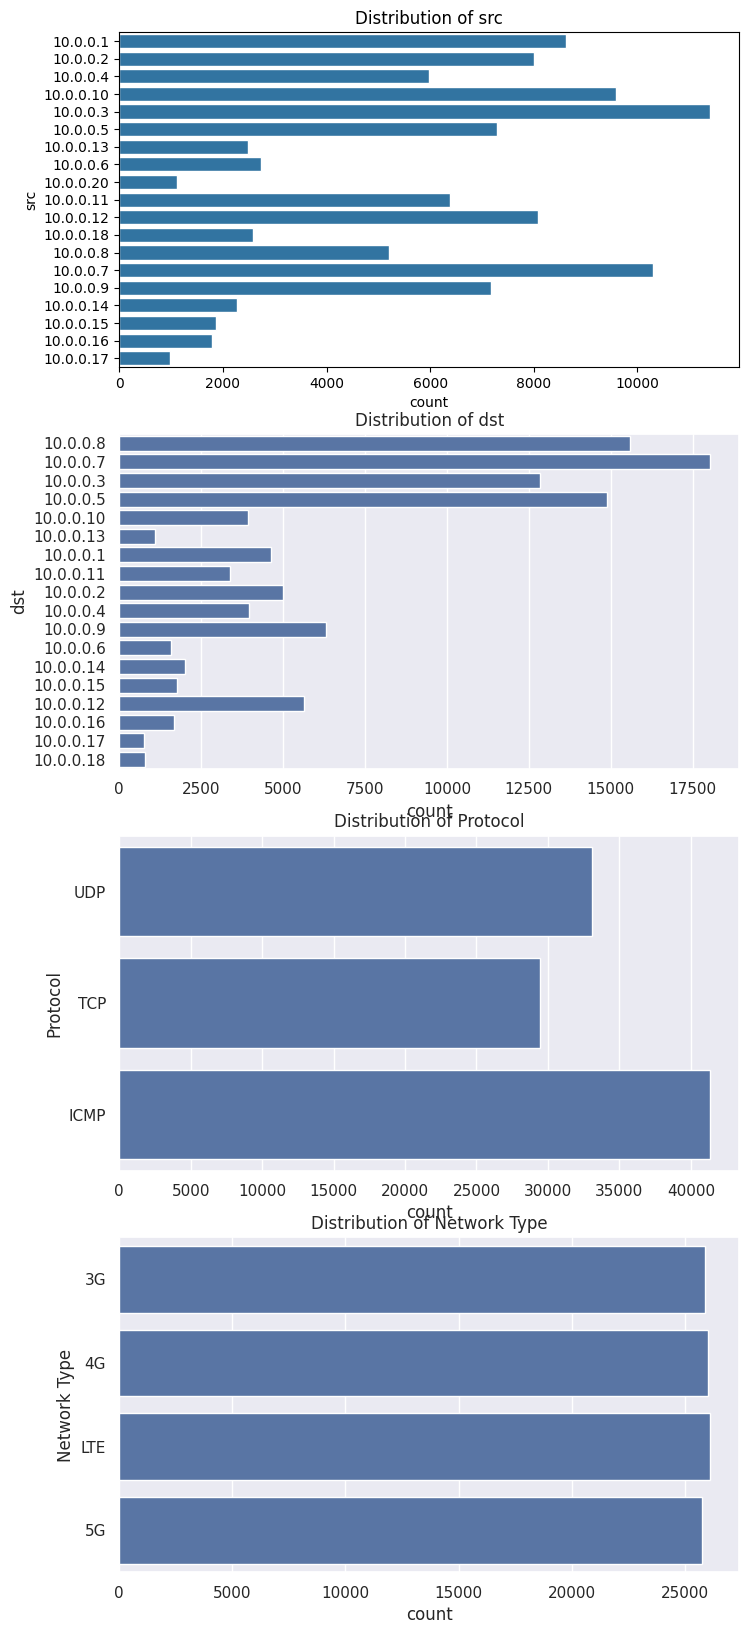

In [24]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

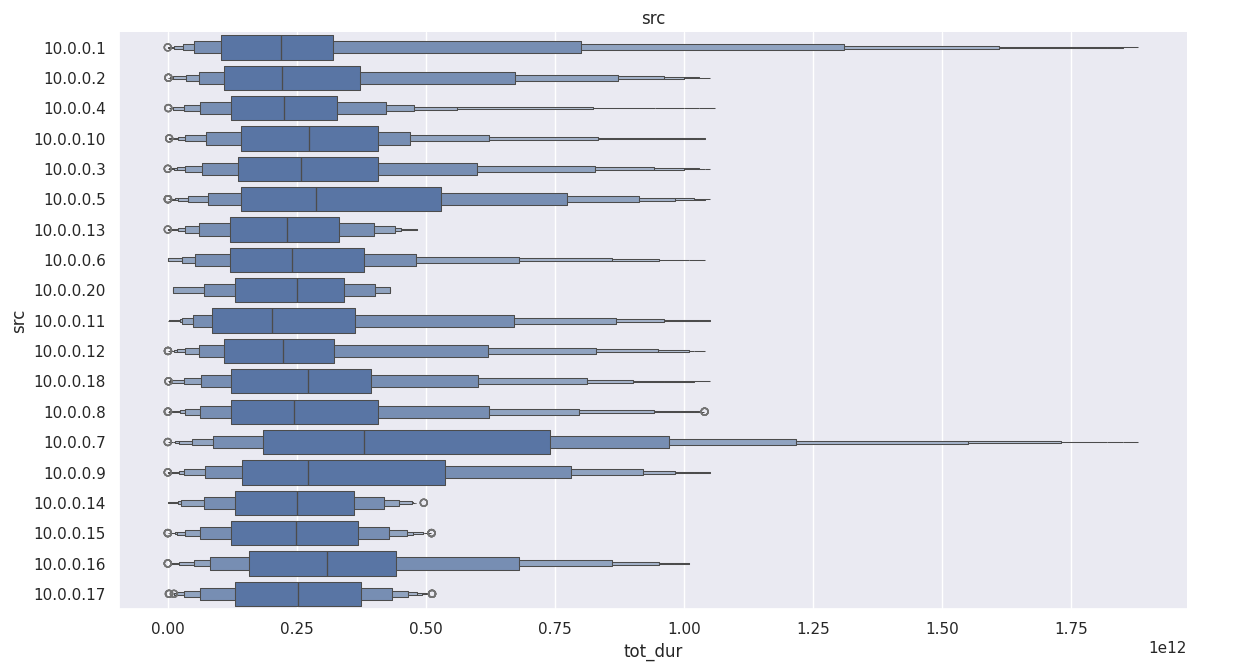

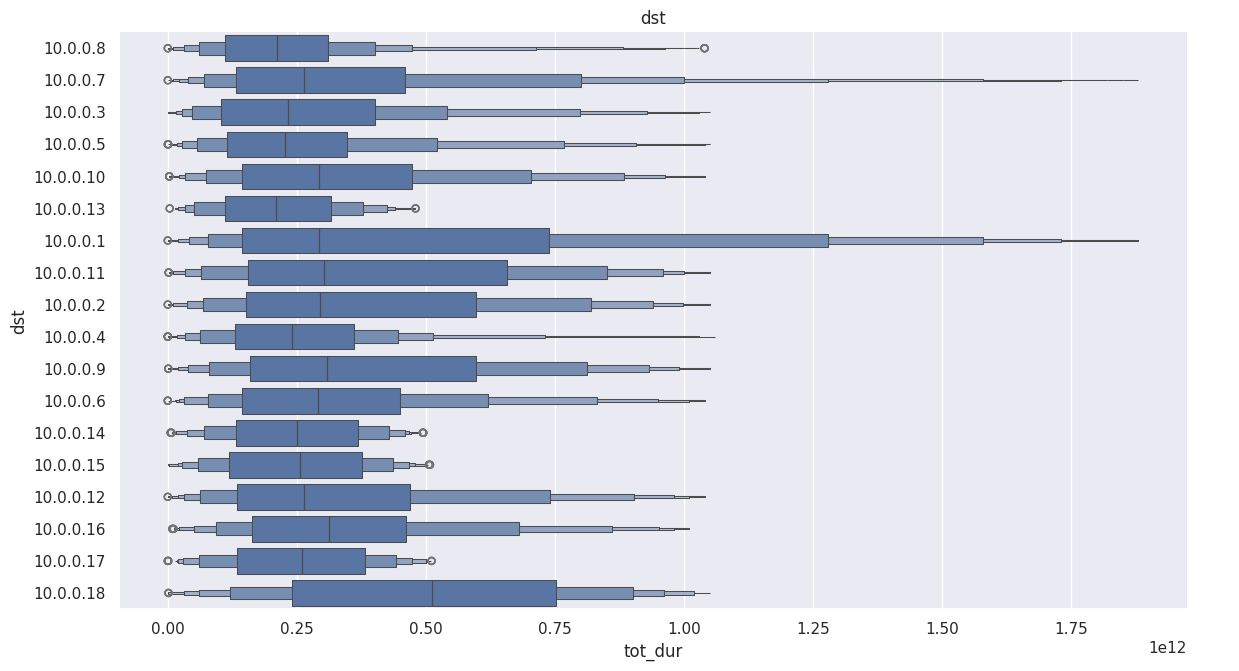

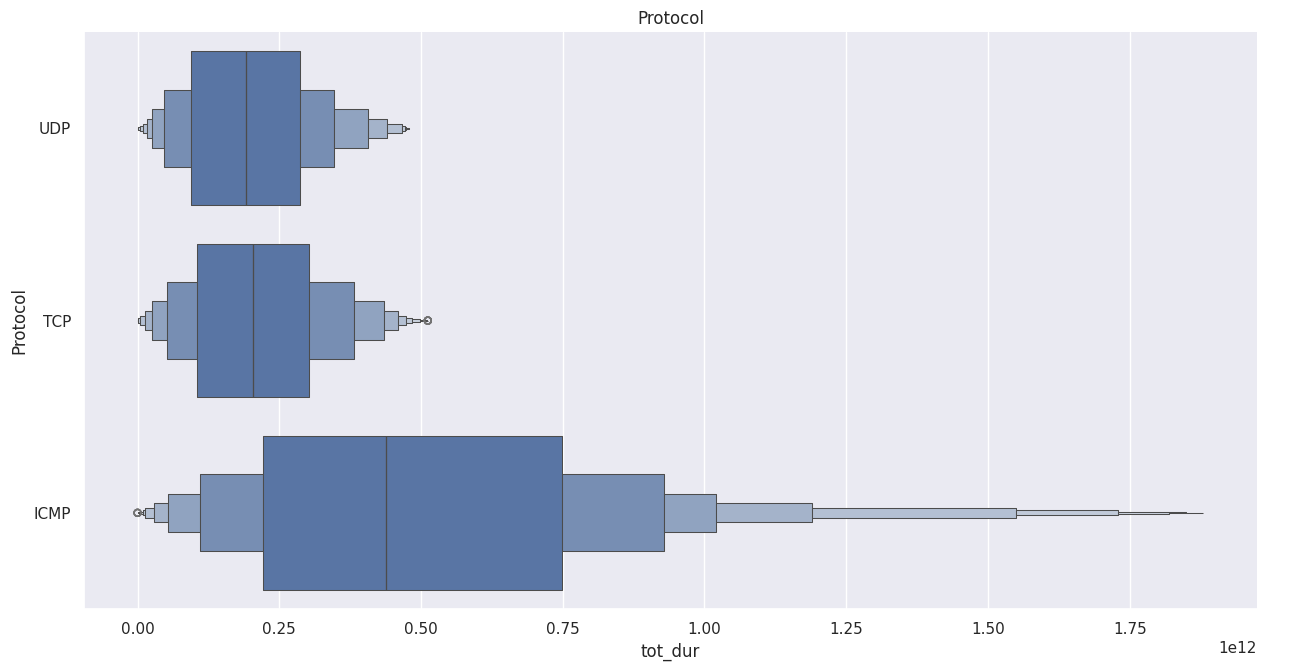

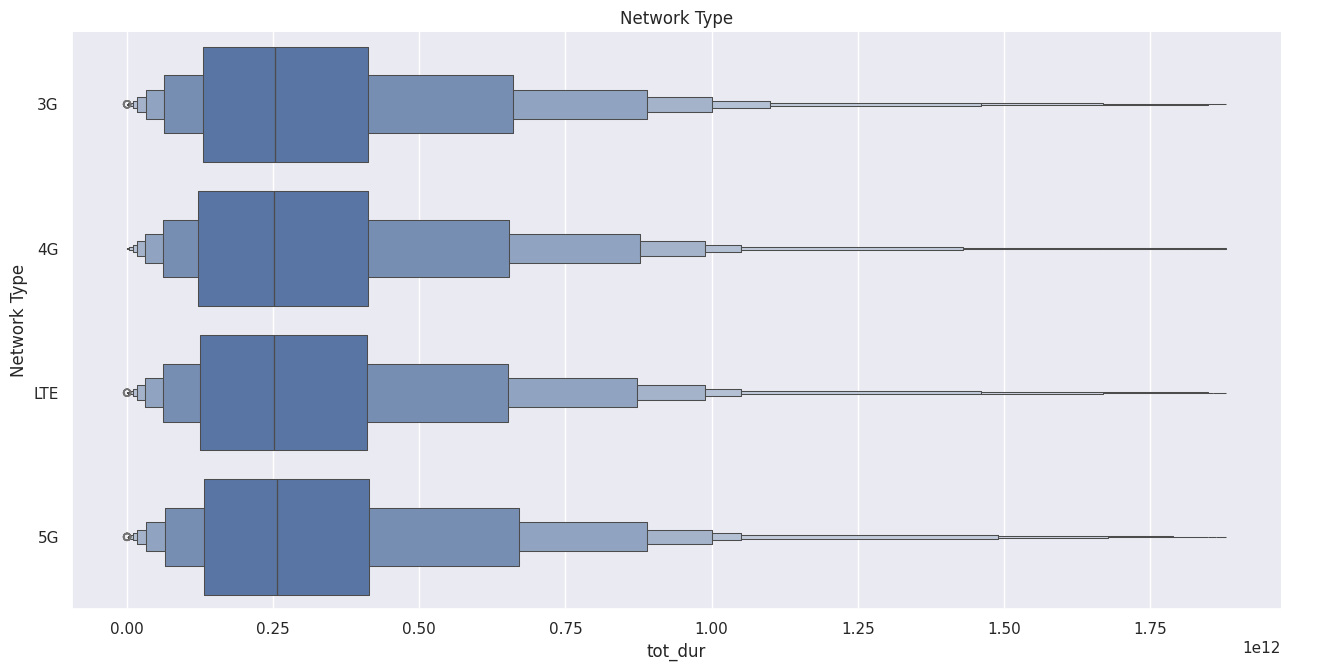

In [25]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=df,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

#### Visualize the distribution of continuous features

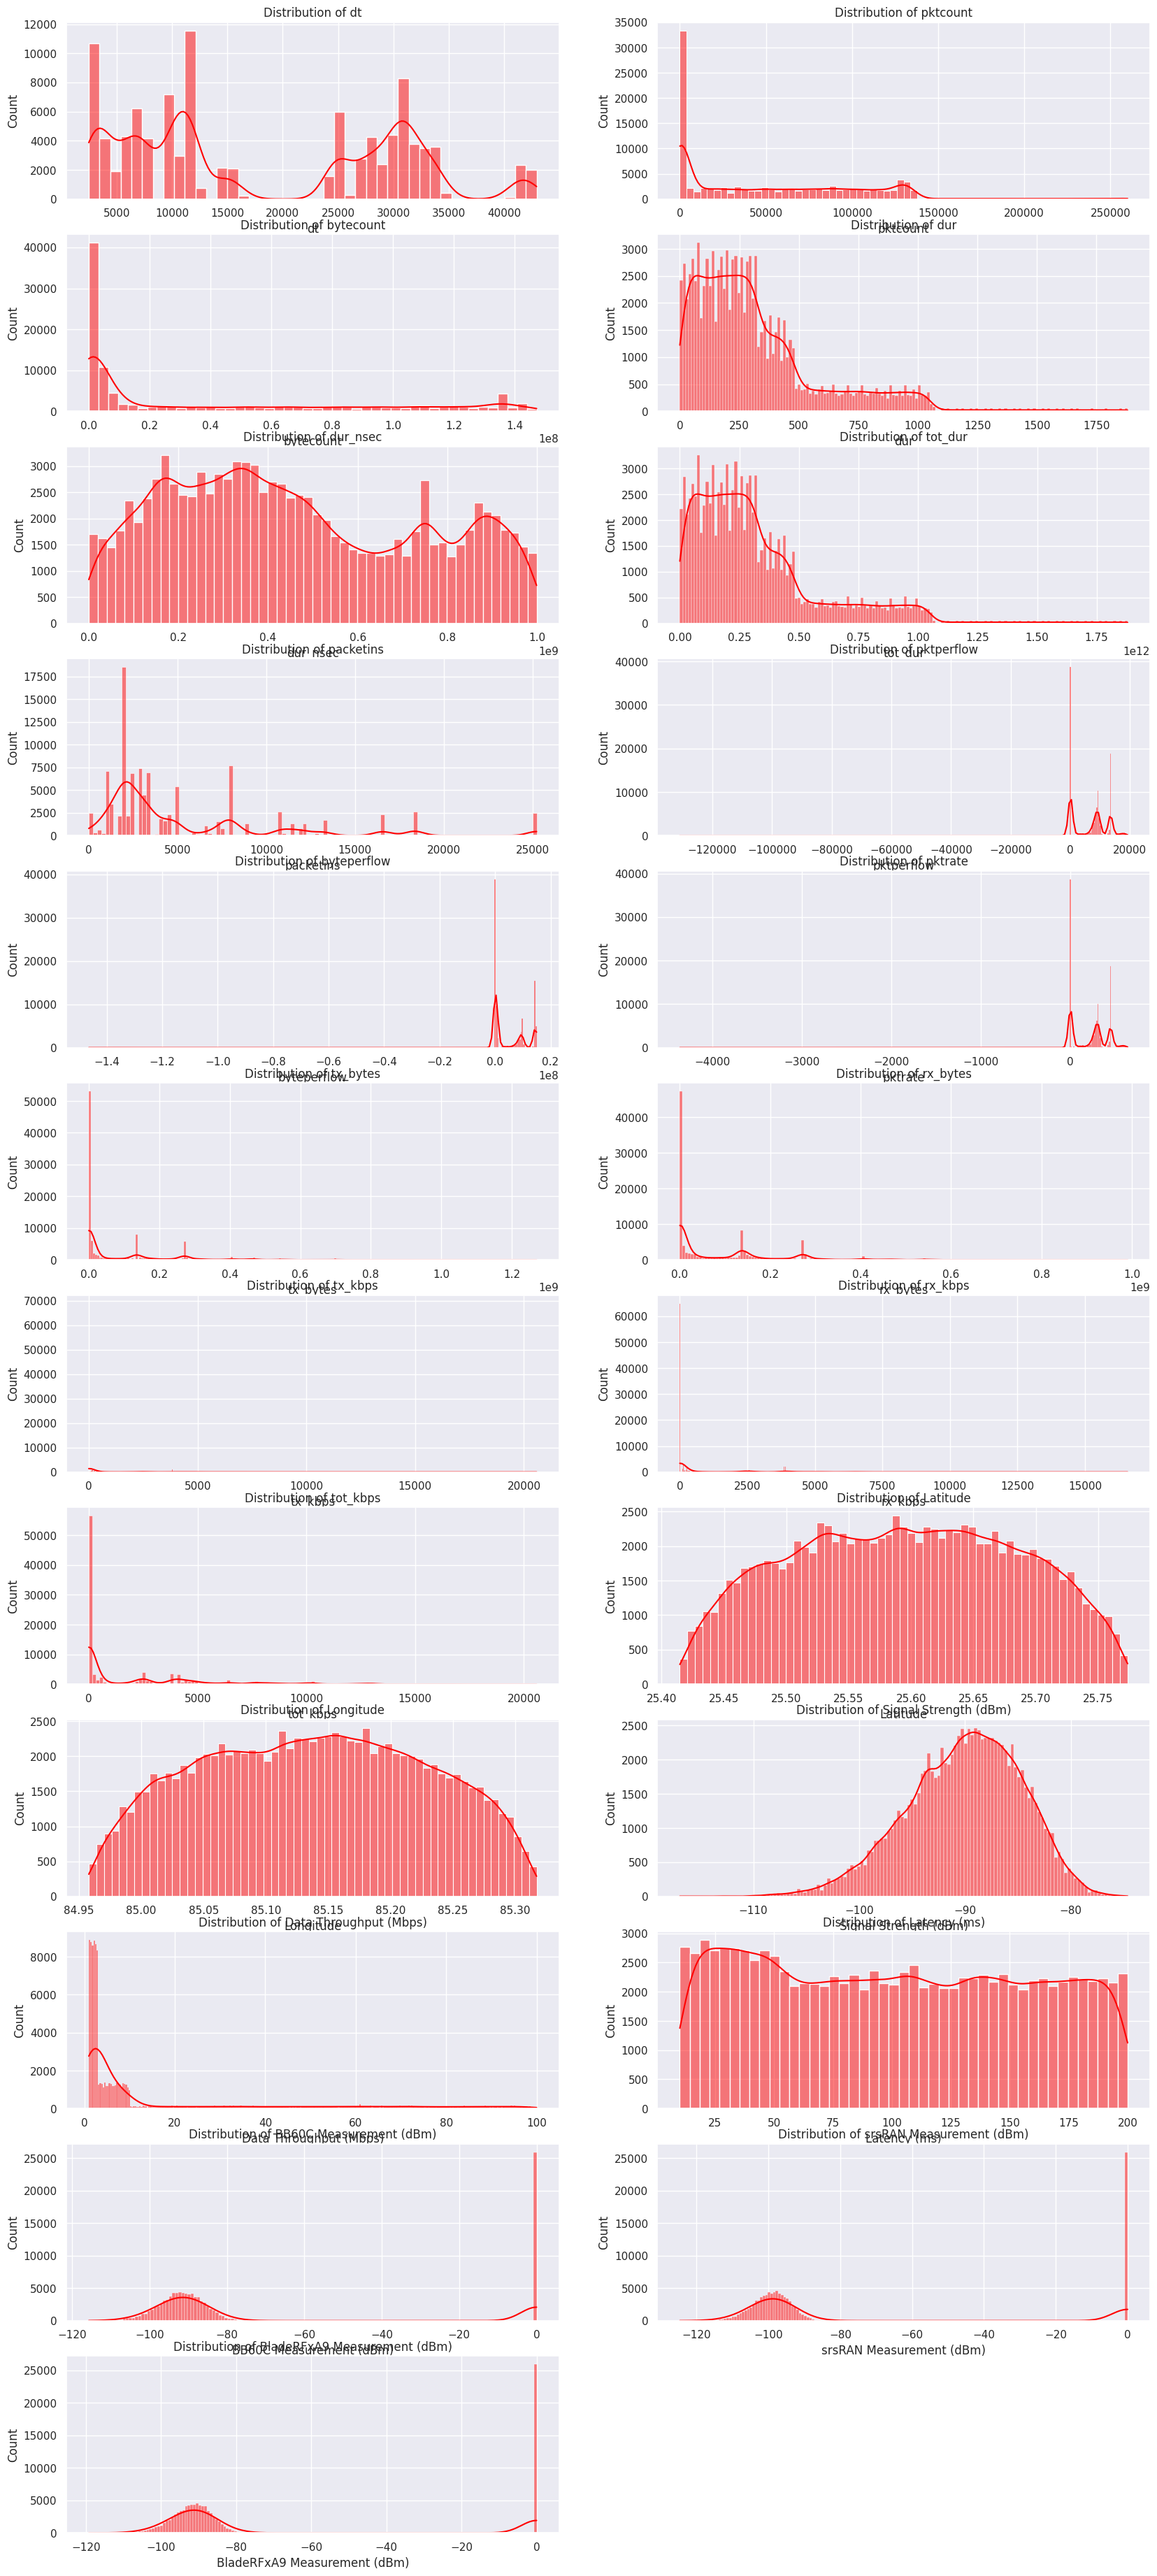

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

#### Visualize the distribution of numerical discrete features

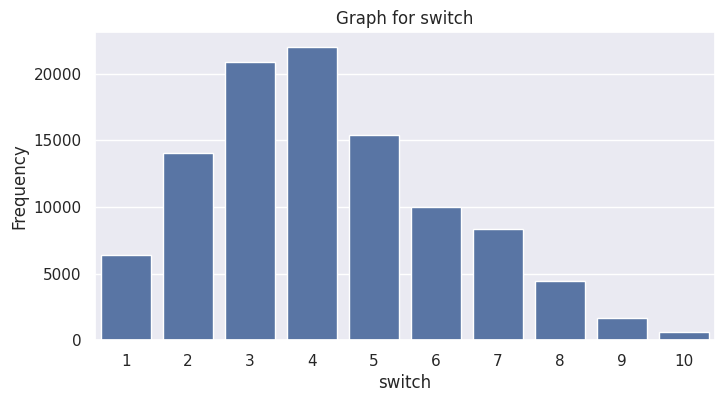

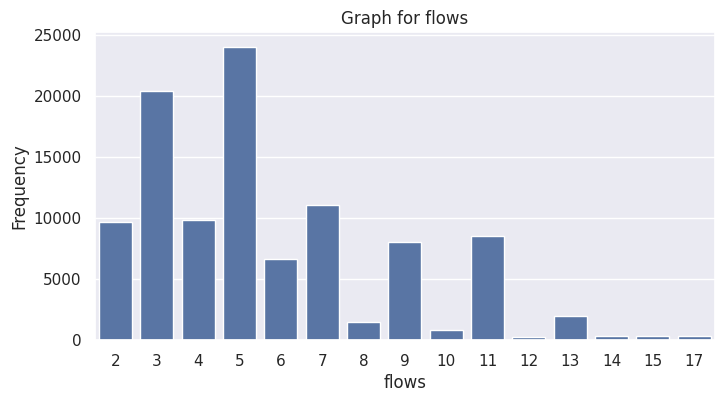

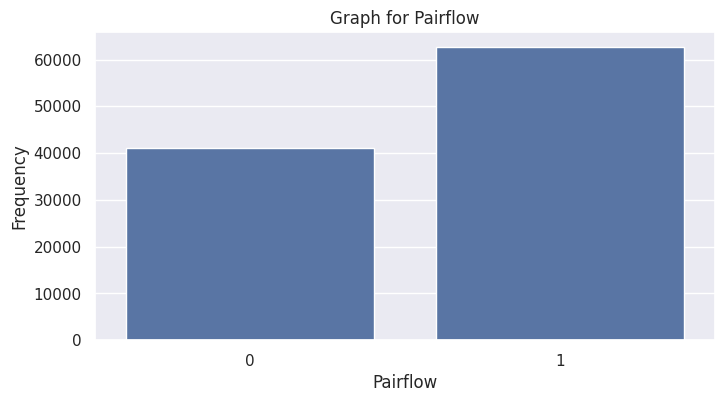

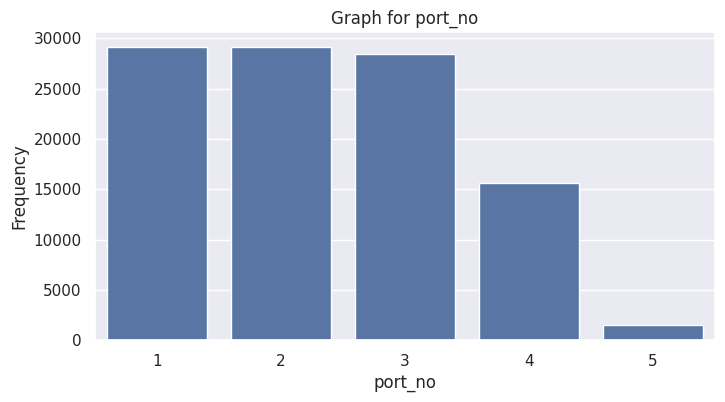

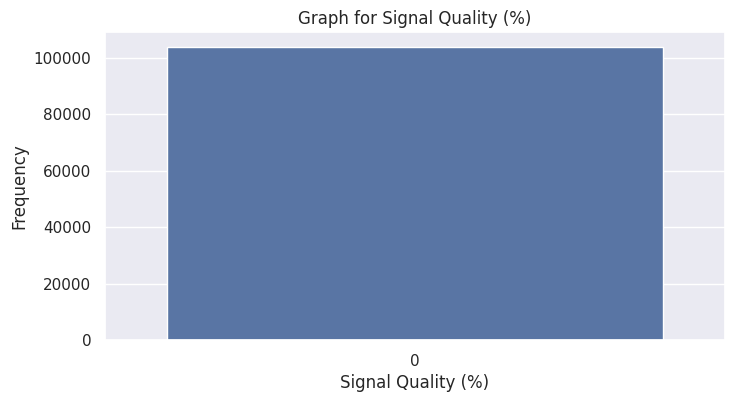

In [27]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [28]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

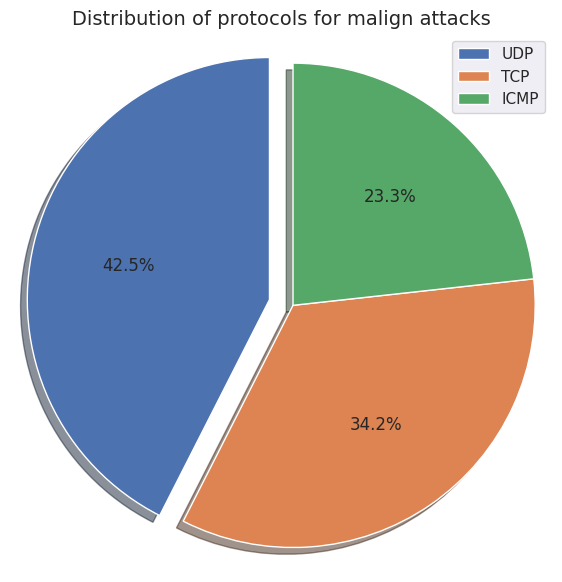

In [29]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

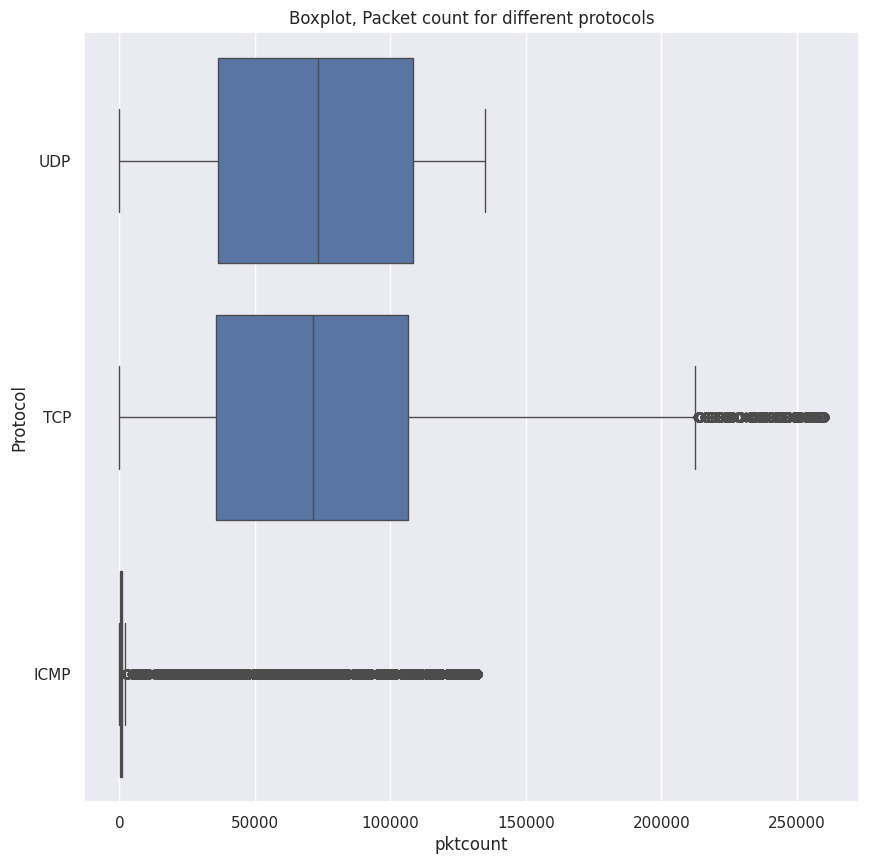

In [30]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

In [31]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol', 'Network Type']


### Encoding categorical features

In [32]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 69 columns after encoding


In [33]:
#dataframe after encoding
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP,Network Type_4G,Network Type_5G,Network Type_LTE
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,True,False,False,True,False,False,False
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,True,False,False,True,True,False,False
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,True,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,True,False,False,True,False,True,False
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,True,False,False,True,False,True,False
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,True,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,True,False,False,True,True,False,False
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,True,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,True,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,True,False,False,True,False,False,False


In [34]:
df.dtypes

,0
dt,int64
switch,int64
pktcount,int64
bytecount,int64
dur,int64
...,...
Protocol_TCP,bool
Protocol_UDP,bool
Network Type_4G,bool
Network Type_5G,bool


### Split into Independent and dependent variables

In [35]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [36]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72687, 68) (31152, 68)


#### Deep Neural Network-LSTM

In [38]:
Classifier_accuracy = []

## Defining the Deep Neural Network-long short term memory

In [39]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(68,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)               │ (None, 28)                  │           1,932 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 10)                  │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,233 (8.72 KB)

 Trainable params: 2,233 (8.72 KB)

 Non-trainable params: 0 (0.00 B)

## Model fitting

In [40]:
# fit model
history_org = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100, verbose=2,
    callbacks=None,
    validation_data=(X_test,y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=10)

Epoch 11/100
2272/2272 - 6s - 3ms/step - accuracy: 0.9244 - loss: 0.1774 - val_accuracy: 0.9520 - val_loss: 0.1147
Epoch 12/100
2272/2272 - 6s - 2ms/step - accuracy: 0.9606 - loss: 0.0965 - val_accuracy: 0.9668 - val_loss: 0.0853
Epoch 13/100
2272/2272 - 4s - 2ms/step - accuracy: 0.9685 - loss: 0.0791 - val_accuracy: 0.9749 - val_loss: 0.0634
Epoch 14/100
2272/2272 - 4s - 2ms/step - accuracy: 0.9727 - loss: 0.0712 - val_accuracy: 0.9665 - val_loss: 0.0828
Epoch 15/100
2272/2272 - 7s - 3ms/step - accuracy: 0.9741 - loss: 0.0650 - val_accuracy: 0.9731 - val_loss: 0.0671
Epoch 16/100
2272/2272 - 4s - 2ms/step - accuracy: 0.9762 - loss: 0.0597 - val_accuracy: 0.9798 - val_loss: 0.0511
Epoch 17/100
2272/2272 - 5s - 2ms/step - accuracy: 0.9777 - loss: 0.0573 - val_accuracy: 0.9790 - val_loss: 0.0525
Epoch 18/100
2272/2272 - 7s - 3ms/step - accuracy: 0.9787 - loss: 0.0542 - val_accuracy: 0.9797 - val_loss: 0.0509
Epoch 19/100
2272/2272 - 4s - 2ms/step - accuracy: 0.9801 - loss: 0.0505 - val_a

## Plotting Loss v/s Epochs

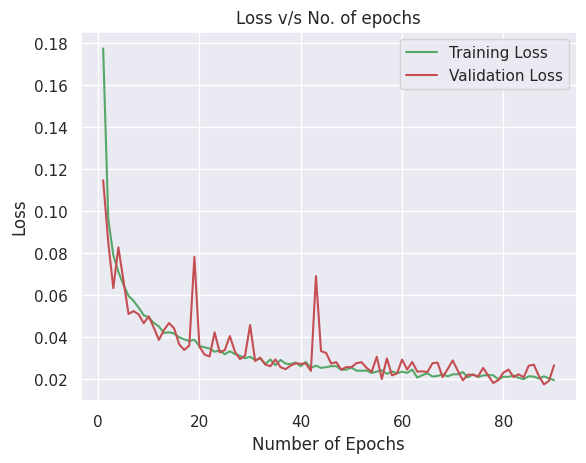

In [41]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs

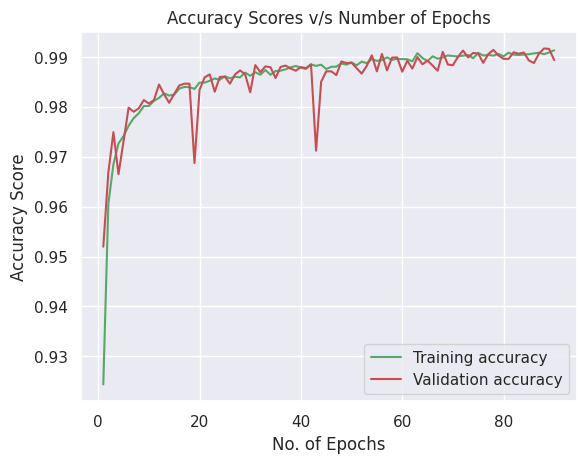

In [42]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

974/974 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9900 - loss: 0.0240
Accuracy of Deep neural Network : 98.93


#### K-Nearest Neighbor Classifier

In [44]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 94.15


#### SVM Classifier

In [45]:
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

Accuracy of SVM Classifier : 96.60


#### Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 96.28


#### Naive Bayes Classifier

In [ ]:
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

Accuracy of Naive Bayes Classifier : 71.29


#### Quadratic Discriminant Analysis Classifier

In [ ]:
qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train,y_train)
y_pred=qda_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

Accuracy of QDA Classifier : 53.71


#### Stochastic Gradient Classifier

In [ ]:
sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

Accuracy of SGD Classifier : 83.37


#### Logistic Regression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 83.69


#### XGBoost Classifier

In [ ]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))

Accuracy of XGBoost Classifier : 98.23


### Comparitive analysis of models

In [ ]:
Classifier_names = ["DNN-LSTM", "KNN", "RBF_SVM", "Decision Tree","Naive Bayes","Quadratic","SGD","Logistic Regression","XGBoost"]

In [ ]:
# @title
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
0,DNN-LSTM,98.841166
8,XGBoost,98.228043
2,RBF_SVM,96.545968
3,Decision Tree,96.279533
1,KNN,94.173729
7,Logistic Regression,83.692861
6,SGD,83.371854
4,Naive Bayes,71.292373
5,Quadratic,53.714047


#### Visualize accuracies of the models

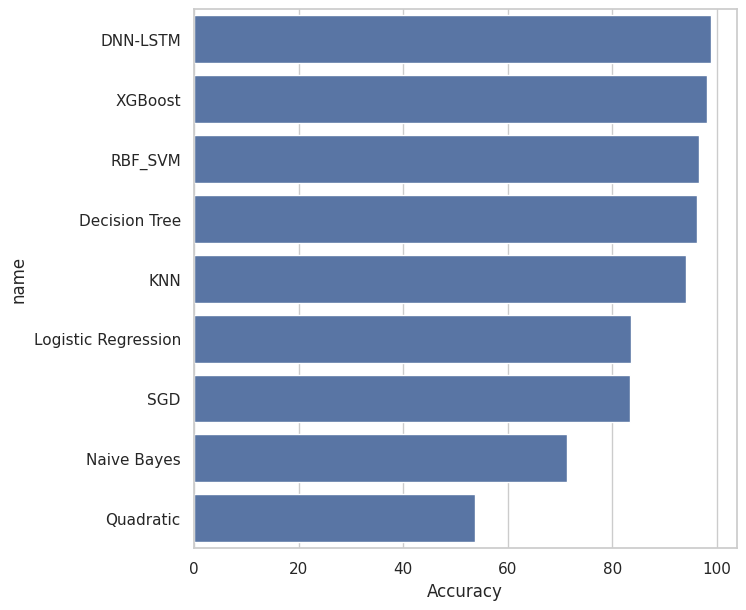

In [ ]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

In [ ]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is DNN-LSTM with an accuracy of 98.84116649627686.


## Hyperparameter tuning

In [ ]:
def model_builder(hp):
    model = keras.Sequential()

    model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
    model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
    model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
    opt = keras.optimizers.Adam(learning_rate=0.01)

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])

    return history, model.layers, model

In [ ]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
classes = model.predict(X_test)
print(classes)

974/974 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[[1.        ]
 [0.        ]
 [0.03803799]
 ...
 [0.        ]
 [0.        ]
 [1.        ]]


In [ ]:
y_pred = []
for i in classes:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:20]

[1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

In [ ]:
y_test[:20]

,label
38368,1
94520,0
36013,0
55773,0
56020,0
70441,1
34149,0
82281,1
76266,1
58529,1


## Classification Report

In [ ]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

      benign       1.00      0.98      0.99     18993
      malign       0.98      1.00      0.99     12159

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152



## Plotting Confusion Matrix

In [ ]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)]
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

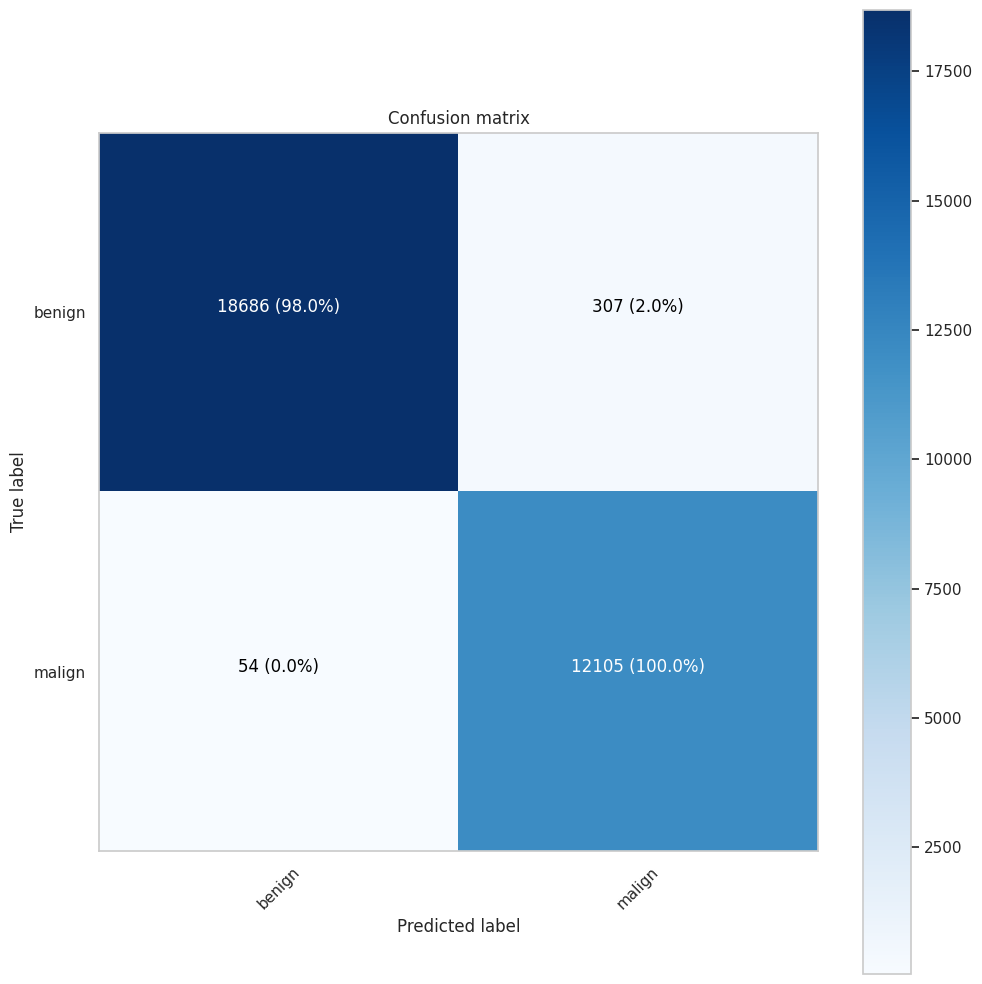

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = labels)